In [7]:
import sv_utils
import torch 
import numpy as np
import pylab as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from os.path import dirname, realpath
from singleNeuron import preSpikes, nextSpikes, STDPLIFDensePopulation, convergence_level

## Sequence Visualizer

El proposito de esta notebook es el poder graficar tanto la entrada como salida de la red DSNN que reconoce patrones en una secuencia de numeros aleatorios.

In [3]:
Sin_tmp = np.load('./sequences/all_nums/all_nums.npy')
print(Sin_tmp.shape)
Sin = np.reshape(Sin_tmp, (Sin_tmp.shape[0]*Sin_tmp.shape[1], Sin_tmp.shape[2]))
Sin = np.transpose(Sin)
print(Sin.shape)

(34, 34, 37485)
(37485, 1156)


### Tren de spikes de entrada

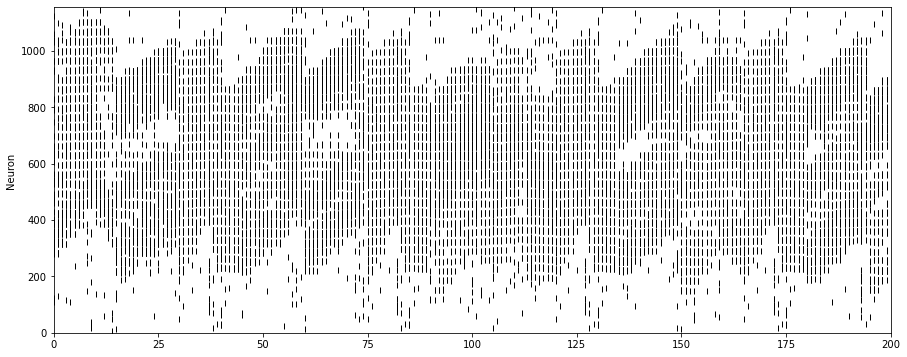

Spikes: 3579729


In [4]:
plt.rcParams["figure.figsize"] =(15,6)
sv_utils.plotLIF(U=None, S=Sin[:200])
print("Spikes: " + str(np.count_nonzero(Sin)))

### Tren de spikes de salida 

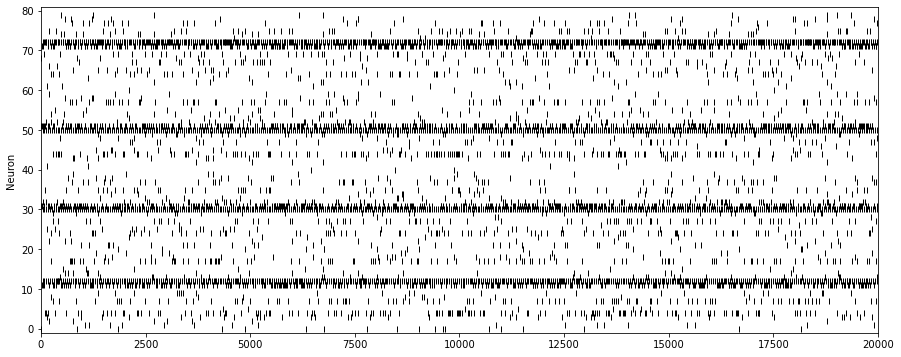

torch.Size([37485, 80])
Spikes: 10027


In [5]:
Sin_out_s = torch.load('../cleanDSNN/results/old_results/all_nums/layer_5_conv.pt')
sv_utils.plotLIF(U=None, S=Sin_out_s[:20000].data.numpy())
print(Sin_out_s.shape)
print("Spikes: " + str(np.count_nonzero(Sin_out_s)))

## Entrenamos a la neurona de salida

In [ ]:
pat_times = np.load('./sequences/all_nums/pat_all_nums.npy')
Sin_tmp = Sin_out_s.clone().detach()
T = Sin_tmp.shape[0]
N_out = 1
N_in = Sin_tmp.shape[1]
th = 3.5

singleNeuron = STDPLIFDensePopulation(in_channels=N_in, out_channels=N_out,
                                        weight=0.7, alpha=float(np.exp(-1e-3/10e-3)),
                                        beta=float(np.exp(-1e-3/2e-5)), delay=0,
                                        th=th, a_plus=.03125, a_minus=.045625,
                                        w_max=1.)
Sin = Sin_tmp.clone().detach()

# Pre-procesamos PSpikes y NSpikes
dt_ltp = 20  # Cantidad de timesteps que miro hacia atras
dt_ltd = 70  # Cantidad de timesteps que miro hacia delante
PSpikes = preSpikes(T, dt_ltp, torch.zeros(T, N_in), Sin)
NSpikes = nextSpikes(T, dt_ltd, torch.zeros(T, N_in), Sin)

# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])

n = 0
t = 0
c_l = 1.
while (c_l > 0.05) and (t < 100000):
    state = singleNeuron.forward(Sin[n].unsqueeze(0), PSpikes[n], NSpikes[n-1])
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    n += 1
    if n >= T:
        n = 0
    c_l = convergence_level(singleNeuron.fc_layer.weight[0])
    t += 1
    if t % 500:
        print("iter: " + str(t) + " convergence: " + str(c_l))



iter: 1 convergence: 0.21000000476837144
iter: 2 convergence: 0.21000000476837144
iter: 3 convergence: 0.21000000476837144
iter: 4 convergence: 0.21000000476837144
iter: 5 convergence: 0.21000000476837144
iter: 6 convergence: 0.21000000476837144
iter: 7 convergence: 0.21000000476837144
iter: 8 convergence: 0.21000000476837144
iter: 9 convergence: 0.21000000476837144
iter: 10 convergence: 0.21000000476837144
iter: 11 convergence: 0.21000000476837144
iter: 12 convergence: 0.21000000476837144
iter: 13 convergence: 0.21000000476837144
iter: 14 convergence: 0.21000000476837144
iter: 15 convergence: 0.21000000476837144
iter: 16 convergence: 0.21000000476837144
iter: 17 convergence: 0.21000000476837144
iter: 18 convergence: 0.21000000476837144
iter: 19 convergence: 0.21000000476837144
iter: 20 convergence: 0.21000000476837144
iter: 21 convergence: 0.21000000476837144
iter: 22 convergence: 0.21000000476837144
iter: 23 convergence: 0.21000000476837144
iter: 24 convergence: 0.21000000476837144
i

iter: 345 convergence: 0.2072005098813099
iter: 346 convergence: 0.2072005098813099
iter: 347 convergence: 0.2072005098813099
iter: 348 convergence: 0.2072005098813099
iter: 349 convergence: 0.2072005098813099
iter: 350 convergence: 0.2072005098813099
iter: 351 convergence: 0.2072005098813099
iter: 352 convergence: 0.2072005098813099
iter: 353 convergence: 0.2072005098813099
iter: 354 convergence: 0.2072005098813099
iter: 355 convergence: 0.2064900164855626
iter: 356 convergence: 0.2064900164855626
iter: 357 convergence: 0.2064900164855626
iter: 358 convergence: 0.2064900164855626
iter: 359 convergence: 0.2064900164855626
iter: 360 convergence: 0.2064900164855626
iter: 361 convergence: 0.2064900164855626
iter: 362 convergence: 0.2064900164855626
iter: 363 convergence: 0.2064900164855626
iter: 364 convergence: 0.2064900164855626
iter: 365 convergence: 0.2064900164855626
iter: 366 convergence: 0.2064900164855626
iter: 367 convergence: 0.2064900164855626
iter: 368 convergence: 0.206490016

iter: 659 convergence: 0.2054128653797999
iter: 660 convergence: 0.2054128653797999
iter: 661 convergence: 0.2054128653797999
iter: 662 convergence: 0.2054128653797999
iter: 663 convergence: 0.2054128653797999
iter: 664 convergence: 0.2054128653797999
iter: 665 convergence: 0.2054128653797999
iter: 666 convergence: 0.2054128653797999
iter: 667 convergence: 0.2054128653797999
iter: 668 convergence: 0.2054128653797999
iter: 669 convergence: 0.2054128653797999
iter: 670 convergence: 0.2058636278949534
iter: 671 convergence: 0.2058636278949534
iter: 672 convergence: 0.2058636278949534
iter: 673 convergence: 0.2058636278949534
iter: 674 convergence: 0.2058636278949534
iter: 675 convergence: 0.2058636278949534
iter: 676 convergence: 0.2058636278949534
iter: 677 convergence: 0.2058636278949534
iter: 678 convergence: 0.2058636278949534
iter: 679 convergence: 0.2058636278949534
iter: 680 convergence: 0.2058636278949534
iter: 681 convergence: 0.2058636278949534
iter: 682 convergence: 0.205863627

iter: 986 convergence: 0.20872513320309077
iter: 987 convergence: 0.20872513320309077
iter: 988 convergence: 0.20872513320309077
iter: 989 convergence: 0.20872513320309077
iter: 990 convergence: 0.20872513320309077
iter: 991 convergence: 0.20872513320309077
iter: 992 convergence: 0.20872513320309077
iter: 993 convergence: 0.20872513320309077
iter: 994 convergence: 0.20872513320309077
iter: 995 convergence: 0.20872513320309077
iter: 996 convergence: 0.20872513320309077
iter: 997 convergence: 0.20872513320309077
iter: 998 convergence: 0.20872513320309077
iter: 999 convergence: 0.20872513320309077
iter: 1001 convergence: 0.20872513320309077
iter: 1002 convergence: 0.20872513320309077
iter: 1003 convergence: 0.20872513320309077
iter: 1004 convergence: 0.20872513320309077
iter: 1005 convergence: 0.20872513320309077
iter: 1006 convergence: 0.20872513320309077
iter: 1007 convergence: 0.20872513320309077
iter: 1008 convergence: 0.20872513320309077
iter: 1009 convergence: 0.20872513320309077
it

iter: 1308 convergence: 0.21076559269692446
iter: 1309 convergence: 0.21076559269692446
iter: 1310 convergence: 0.21076559269692446
iter: 1311 convergence: 0.21076559269692446
iter: 1312 convergence: 0.21076559269692446
iter: 1313 convergence: 0.21076559269692446
iter: 1314 convergence: 0.21076559269692446
iter: 1315 convergence: 0.21076559269692446
iter: 1316 convergence: 0.21076559269692446
iter: 1317 convergence: 0.21076559269692446
iter: 1318 convergence: 0.21076559269692446
iter: 1319 convergence: 0.21076559269692446
iter: 1320 convergence: 0.21076559269692446
iter: 1321 convergence: 0.21076559269692446
iter: 1322 convergence: 0.21076559269692446
iter: 1323 convergence: 0.21076559269692446
iter: 1324 convergence: 0.21076559269692446
iter: 1325 convergence: 0.21076559269692446
iter: 1326 convergence: 0.21076559269692446
iter: 1327 convergence: 0.21076559269692446
iter: 1328 convergence: 0.21076559269692446
iter: 1329 convergence: 0.21076559269692446
iter: 1330 convergence: 0.210765

iter: 1626 convergence: 0.21281968076670607
iter: 1627 convergence: 0.21281968076670607
iter: 1628 convergence: 0.21281968076670607
iter: 1629 convergence: 0.21281968076670607
iter: 1630 convergence: 0.21281968076670607
iter: 1631 convergence: 0.21281968076670607
iter: 1632 convergence: 0.21281968076670607
iter: 1633 convergence: 0.21281968076670607
iter: 1634 convergence: 0.21281968076670607
iter: 1635 convergence: 0.21281968076670607
iter: 1636 convergence: 0.21281968076670607
iter: 1637 convergence: 0.21281968076670607
iter: 1638 convergence: 0.21281968076670607
iter: 1639 convergence: 0.21281968076670607
iter: 1640 convergence: 0.21281968076670607
iter: 1641 convergence: 0.21281968076670607
iter: 1642 convergence: 0.21281968076670607
iter: 1643 convergence: 0.21281968076670607
iter: 1644 convergence: 0.21281968076670607
iter: 1645 convergence: 0.21281968076670607
iter: 1646 convergence: 0.21281968076670607
iter: 1647 convergence: 0.21281968076670607
iter: 1648 convergence: 0.212819

iter: 1954 convergence: 0.21482026645985522
iter: 1955 convergence: 0.21482026645985522
iter: 1956 convergence: 0.21482026645985522
iter: 1957 convergence: 0.21482026645985522
iter: 1958 convergence: 0.21482026645985522
iter: 1959 convergence: 0.21482026645985522
iter: 1960 convergence: 0.21482026645985522
iter: 1961 convergence: 0.21482026645985522
iter: 1962 convergence: 0.21482026645985522
iter: 1963 convergence: 0.21482026645985522
iter: 1964 convergence: 0.21482026645985522
iter: 1965 convergence: 0.21482026645985522
iter: 1966 convergence: 0.21482026645985522
iter: 1967 convergence: 0.21482026645985522
iter: 1968 convergence: 0.21482026645985522
iter: 1969 convergence: 0.21482026645985522
iter: 1970 convergence: 0.21482026645985522
iter: 1971 convergence: 0.21482026645985522
iter: 1972 convergence: 0.21482026645985522
iter: 1973 convergence: 0.21482026645985522
iter: 1974 convergence: 0.21482026645985522
iter: 1975 convergence: 0.2147176999136479
iter: 1976 convergence: 0.2147176

## Graficamos la salida para la secuencia de testing

In [ ]:
# Realizamos el entrenamiento STDP
Uprobe = np.empty([T, N_out])
Iprobe = np.empty([T, N_out])
Sprobe = np.empty([T, N_out])
for n in range(T):
    state = singleNeuron.forward(Sin[n].unsqueeze(0), PSpikes[n], NSpikes[n-1])
    Uprobe[n] = state.U.data.numpy()
    Iprobe[n] = state.I.data.numpy()
    Sprobe[n] = state.S.data.numpy()
    
#sv_utils.plotLIF(U=Uprobe[0:5000], S=Sprobe[0:5000], pat_times=pat_times[0:5000], th=th)
#sv_utils.plotLIF(U=Uprobe[5000:10000], S=Sprobe[5000:10000], pat_times=pat_times[5000:10000], th=th)
#sv_utils.plotLIF(U=Uprobe[10000:15000], S=Sprobe[10000:15000], pat_times=pat_times[10000:15000], th=th)
#sv_utils.plotLIF(U=Uprobe[15000:20000], S=Sprobe[15000:20000], pat_times=pat_times[15000:20000], th=th)
#sv_utils.plotLIF(U=Uprobe[20000:25000], S=Sprobe[20000:25000], pat_times=pat_times[20000:25000], th=th)
#sv_utils.plotLIF(U=Uprobe[25000:30000], S=Sprobe[25000:30000], pat_times=pat_times[25000:30000], th=th)
#sv_utils.plotLIF(U=Uprobe[30000:35000], S=Sprobe[30000:35000], pat_times=pat_times[30000:35000], th=th)
#sv_utils.plotLIF(U=Uprobe[35000:37500], S=Sprobe[35000:37500], pat_times=pat_times[35000:37500], th=th)